**Group 007-13 Project Proposal**

**Introduction**
The data set outlined below is the tennis data set. We kept specific columns in order to remove irrelevant data and keep the most important pieces of data to help us come to our research outcome. We will be investigating whether the number of rank points of a winner or loser of a professional tennis match can be predicted, and what factors are useful in making the prediction. We will evaluate their overall ranking by comparing players rank points with their height, their break points, and their double faults. Break points are considered when the receiving player can win the game by scoring the next point. Double faults occur when a player makes two mistakes during their serve. Break points, height, and double faults can be looked at and related to rank points in order to find the correlation to a tennis player's overall ranking. A preliminary analysis looking at the relationship between each of these factors independently and rank points indicates possible patterns which will hopefully translate to predictive power in k-nearest neighbour regression.

**Preliminary exploratory data analysis**

In [8]:
# loading data and libraries
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)

download.file("https://drive.google.com/uc?export=download&id=1fOQ8sy_qMkQiQEAO6uFdRX4tLI8EpSTn", "tennis_data.csv")
tennis_data <- read_csv("tennis_data.csv", show_col_types = FALSE) |> select(-...1)
tennis_data

New names:
• `` -> `...1`


tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,⋯,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2019-M020,Brisbane,Hard,32,A,20181231,300,105453,2,NA,⋯,54,34,20,14,10,15,9,3590,16,1977
2019-M020,Brisbane,Hard,32,A,20181231,299,106421,4,NA,⋯,52,36,7,10,10,13,16,1977,239,200
2019-M020,Brisbane,Hard,32,A,20181231,298,105453,2,NA,⋯,27,15,6,8,1,5,9,3590,40,1050
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
2017-M-DC-2017-WG-M-BEL-FRA-01,Davis Cup WG F: BEL vs FRA,Hard,4,D,20171124,2,104542,NA,NA,⋯,54,30,12,12,5,11,15,2320,76,667
2017-M-DC-2017-WG-M-BEL-FRA-01,Davis Cup WG F: BEL vs FRA,Hard,4,D,20171124,4,105676,NA,NA,⋯,54,44,13,14,7,10,7,3775,15,2320
2017-M-DC-2017-WG-M-BEL-FRA-01,Davis Cup WG F: BEL vs FRA,Hard,4,D,20171124,5,106298,NA,NA,⋯,53,29,11,11,4,11,18,2235,76,667


In [9]:
# prepping, selecting, and splitting relevant data
set.seed(2132)

winner_data <- tennis_data |> select(winner_rank_points, winner_ht, w_df, w_bpSaved, w_bpFaced) |> 
    filter(w_bpSaved != 0) |> filter(w_bpFaced != 0) |> mutate(w_bpRatio = w_bpSaved/w_bpFaced) |> na.omit()
loser_data <- tennis_data |> select(loser_rank_points, loser_ht, l_df, l_bpSaved, l_bpFaced) |> 
    filter(l_bpSaved != 0) |> filter(l_bpFaced != 0) |> mutate(l_bpRatio = l_bpSaved/l_bpFaced) |> na.omit()

winner_split <- initial_split(winner_data, prop = .75, strata = winner_rank_points)  
winner_train <- training(winner_split)
winner_test <- testing(winner_split)
 winner_train

loser_split <- initial_split(loser_data, prop = .75, strata = loser_rank_points)  
loser_train <- training(loser_split)
loser_test <- testing(loser_split)
 loser_train

winner_rank_points,winner_ht,w_df,w_bpSaved,w_bpFaced,w_bpRatio
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
200,188,2,4,5,0.8000000
200,188,3,4,7,0.5714286
200,188,1,2,3,0.6666667
⋮,⋮,⋮,⋮,⋮,⋮
2975,163,5,5,6,0.8333333
3650,188,6,7,10,0.7000000
3775,163,0,10,10,1.0000000


loser_rank_points,loser_ht,l_df,l_bpSaved,l_bpFaced,l_bpRatio
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
200,188,2,10,13,0.7692308
543,188,4,3,7,0.4285714
507,175,2,4,7,0.5714286
⋮,⋮,⋮,⋮,⋮,⋮
2975,163,5,11,15,0.7333333
2235,185,2,6,11,0.5454545
2320,188,3,7,10,0.7000000


In [33]:
# expository analysis table

exposit_table <- tibble("win_df_leng" = nrow(winner_train), "los_df_leng" = nrow(loser_train), 
                        "win_rp_avg" = mean(winner_train$winner_rank_points), "los_rp_avg" = mean(loser_train$loser_rank_points),
                       "win_ht_avg" = mean(winner_train$winner_ht), "los_ht_avg" = mean(loser_train$er_ht))
exposit_table

win_df_leng,los_df_leng,win_rp_avg,los_rp_avg,win_ht_avg
<int>,<int>,<dbl>,<dbl>,<dbl>
2845,2887,2082.61,1400.626,186.1511


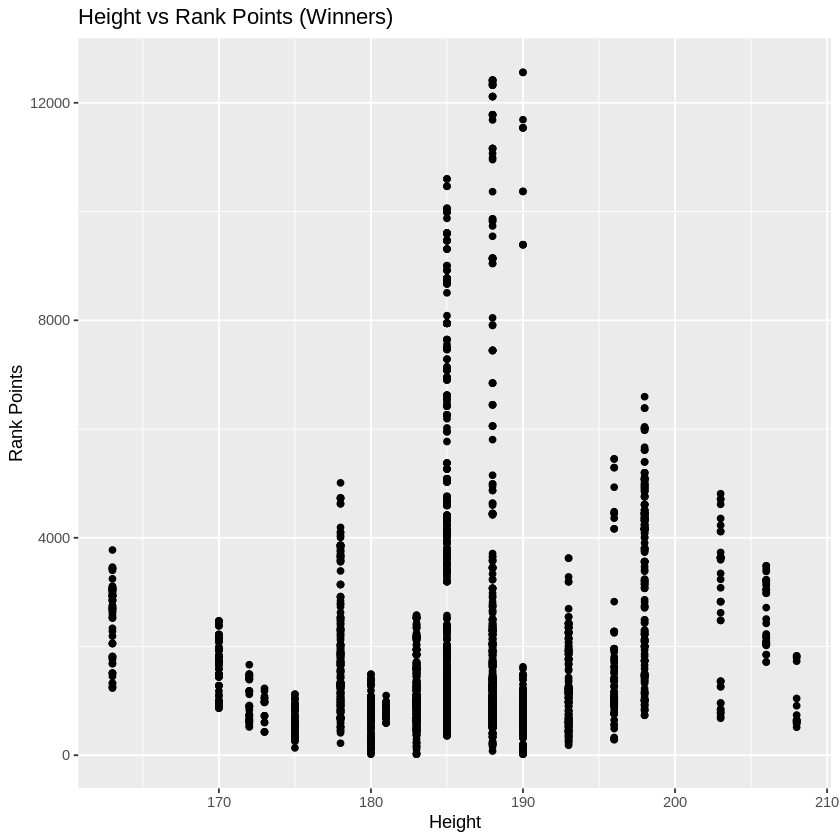

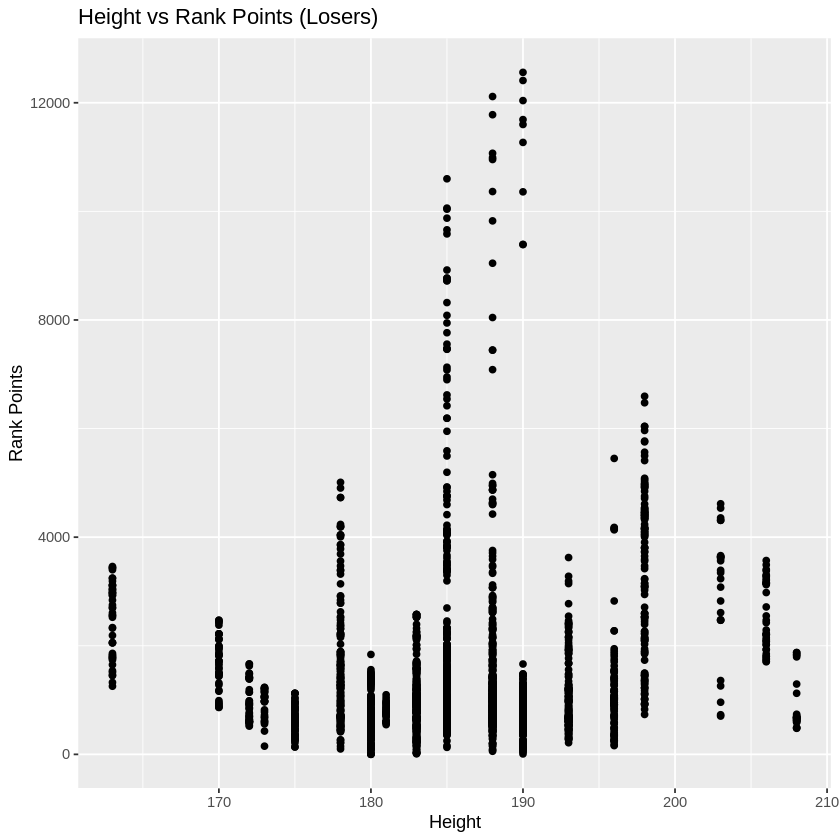

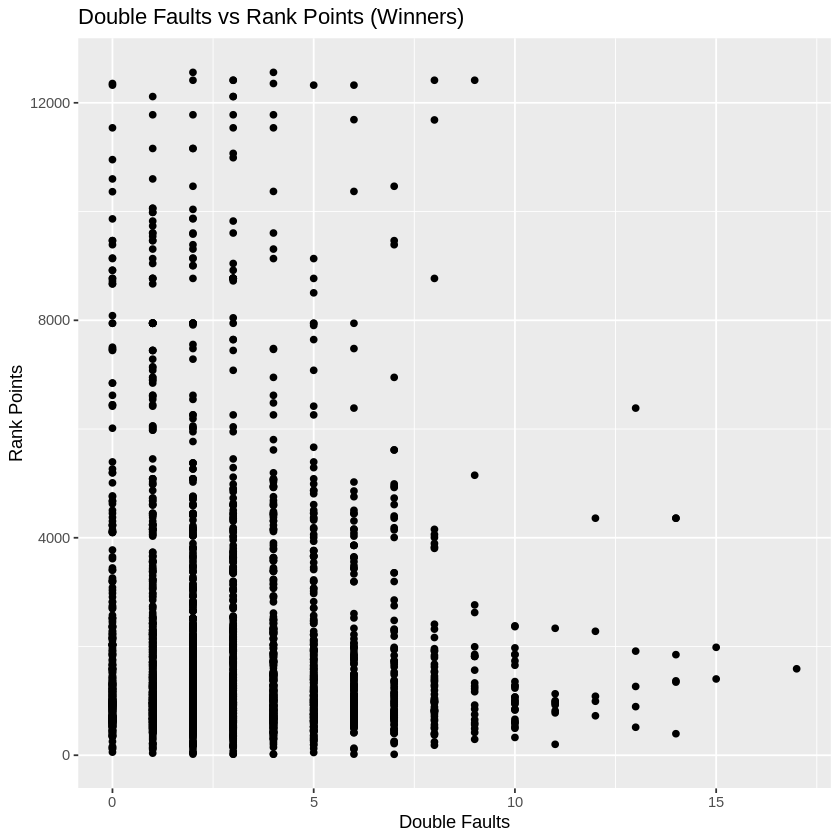

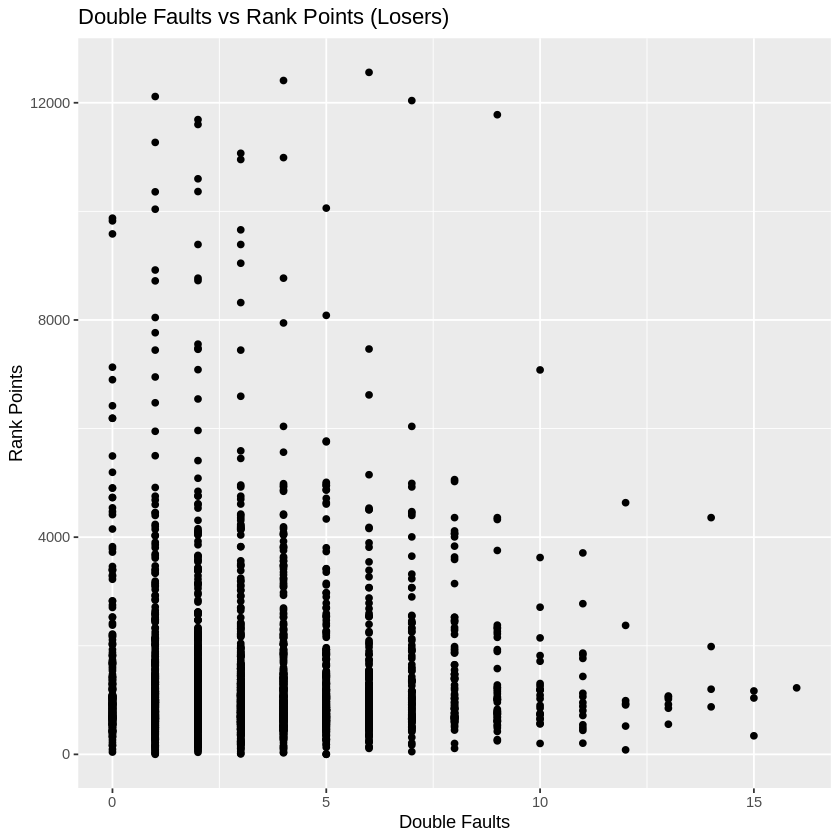

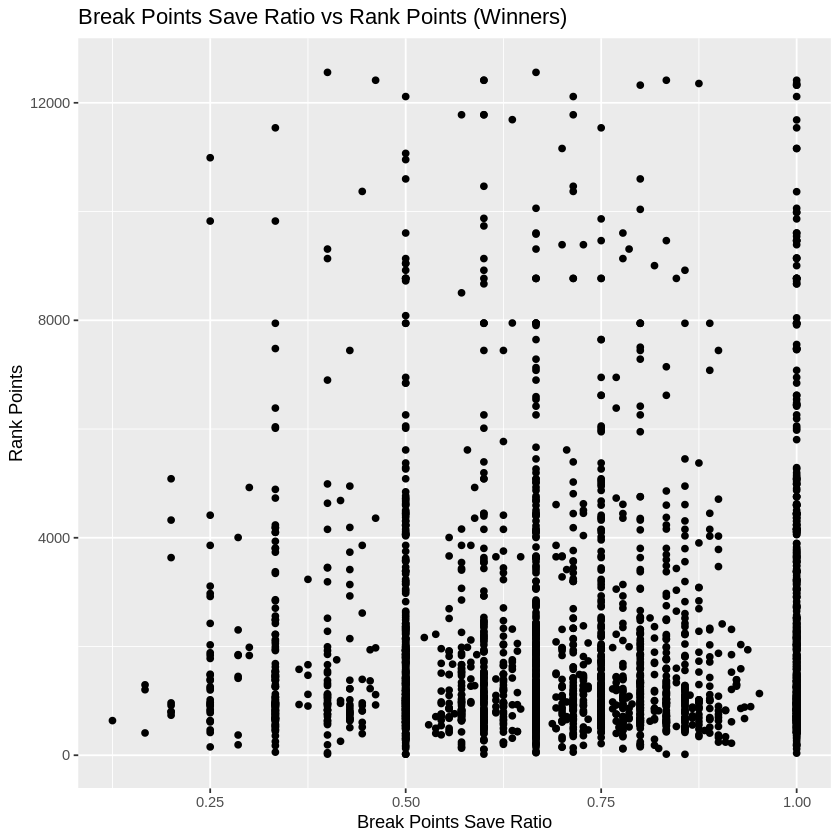

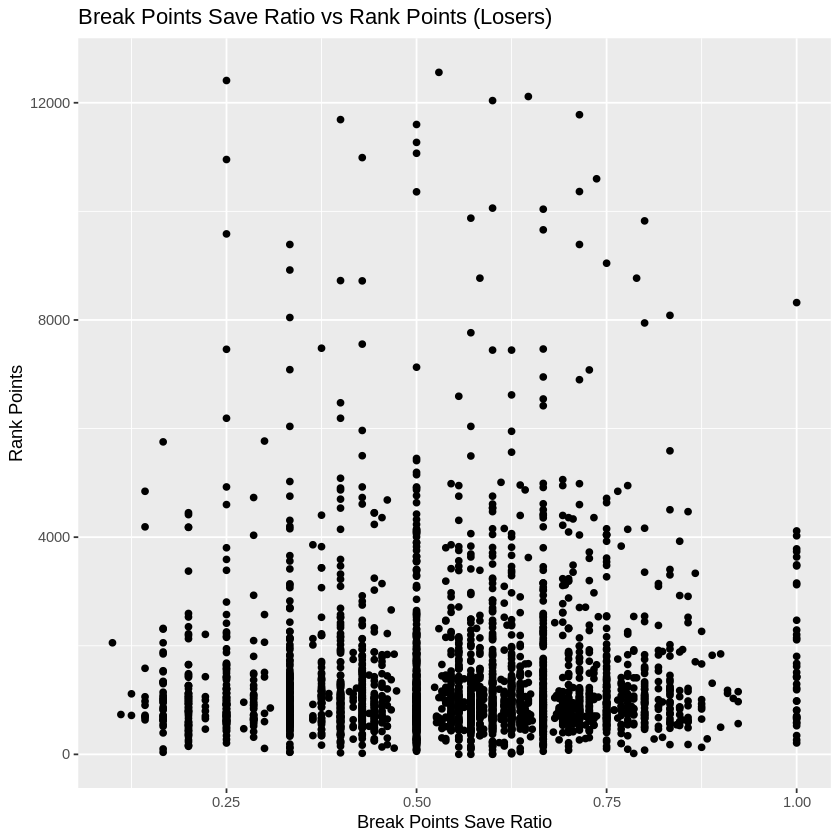

In [29]:
# expository analysis graphs

win_height_plot <- ggplot(winner_train, aes(x = winner_ht, y = winner_rank_points)) +
    geom_point() +
    labs(title = "Height vs Rank Points (Winners)", x = "Height", y = "Rank Points")
win_height_plot

lose_height_plot <- ggplot(loser_train, aes(x = loser_ht, y = loser_rank_points)) +
    geom_point() +
    labs(title = "Height vs Rank Points (Losers)", x = "Height", y = "Rank Points")
lose_height_plot

win_df_plot <- ggplot(winner_train, aes(x = w_df, y = winner_rank_points)) +
    geom_point() +
    labs(title = "Double Faults vs Rank Points (Winners)", x = "Double Faults", y = "Rank Points")
win_df_plot

lose_df_plot <- ggplot(loser_train, aes(x = l_df, y = loser_rank_points)) +
    geom_point() +
    labs(title = "Double Faults vs Rank Points (Losers)", x = "Double Faults", y = "Rank Points")
lose_df_plot

win_bpSaved_plot <- ggplot(winner_train, aes(x = w_bpRatio, y = winner_rank_points)) +
    geom_point() +
    labs(title = "Break Points Save Ratio vs Rank Points (Winners)", x = "Break Points Save Ratio", y = "Rank Points")
win_bpSaved_plot

lose_bpSaved_plot <- ggplot(loser_train, aes(x = l_bpRatio, y = loser_rank_points)) +
    geom_point() +
    labs(title = "Break Points Save Ratio vs Rank Points (Losers)", x = "Break Points Save Ratio", y = "Rank Points")
lose_bpSaved_plot

**Methods**
*Explain how you will conduct either your data analysis and which variables/columns you will use.
Describe at least one way that you will visualize the results*

The goal of this project is to predict a players rank points based off of their height, number of double faults, and the save ration of break points. Initially after the data file was loaded and read, it produced columns illustrating the following variables: tournament identification, tournament name, the surface the game was played on, the size of the draw, tournament level, tournament data, match number, identification of the winner, winner seed, winner entry, first in, first won, second won, number of break points saved, number of break points faced, winner's rank, winner's rank points, loser's rank, loser's rank points. The variables which were unrelated to predictability were eliminated, and graphs were created to plot each other variable against rank points, and examined for possible signs of relationships. The variables that were found to have a correlation were height, number of double faults, and save ratio of break points. With this information our model can predict a players number of rank points which are determined for a given tennis match.

**Expected outcomes and significance** *Answer questions on Canvas*

We expect to be able to roughly model the number of rank points that the winner or loser of a given professional tennis match will have based on their height, the number of double faults they make in the match, and the ratio of saved break points to break points faced.